In [2]:
import glob
import pandas as pd
import numpy as np
import os

In [3]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
import re 

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix
import joblib

In [17]:
all_file= glob.glob("../songData/*.xlsx")
len(all_file)
all_file

['../songData/songType5.xlsx',
 '../songData/songType11.xlsx',
 '../songData/songType12.xlsx',
 '../songData/songType14.xlsx',
 '../songData/songType18.xlsx',
 '../songData/songType15.xlsx',
 '../songData/songType9.xlsx',
 '../songData/songType2.xlsx',
 '../songData/songType13.xlsx',
 '../songData/songType16.xlsx',
 '../songData/songType8.xlsx',
 '../songData/songType6.xlsx',
 '../songData/songType19.xlsx',
 '../songData/songType7.xlsx',
 '../songData/songType1.xlsx',
 '../songData/songType4.xlsx',
 '../songData/songType0.xlsx',
 '../songData/songType17.xlsx',
 '../songData/songType20.xlsx',
 '../songData/songType3.xlsx',
 '../songData/songType10.xlsx']

In [22]:
names = []
count = []
clusters = []
data = []

for each in all_file:
    temp = pd.read_excel(each)
    count.append(len(temp))
    names.append(each.split('/')[2][:-5])
    clusters.append(temp['songType'].iloc[0])
    data.append(temp)
names
data = pd.concat(data)

In [26]:

data = data.sample(frac = 1)
pd.DataFrame(data)
data['lyrics'].iloc[1]

'আমার সারাদেহ খেয়ো গো মাটি এই চোখ দুটি মাটি খেয়ো না আমি মরে গেলেও তারে দেখার সাধ মিটবে না গো মিটবে না তারে এক জনমে ভালোবেসে ভরবে না মন ভরবে না ওরে… ইচ্ছে করে বুকের ভিতর লুকিয়ে রাখি তারে যেন না পারে সে যেতে আমায় কোনদিনও ছেড়ে আমি এই জগতে তারে ছাড়া থাকবো নারে থাকবো না তারে এক জনমে ভালোবেসে ভরবে না মন ভরবে না ওরে… এই না ভুবন ছাড়তে হবে দুইদিন আগে পরে বিধি, একই সঙ্গে রেখো মোদের একই মাটির ঘরে আমি এই না ঘরে থাকতে একা পারবো নারে পারবো না তারে এক জনমে ভালোবেসে ভরবে না মন ভরবে না'

In [27]:
stop_words = [ 'হাই', 'ফ্রিকুয়েন্সি', 'কিন্তু', 'অপ্রয়োজনীয়', 'শব্দ' ]

In [28]:
data['lyrics']= data['lyrics'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [29]:
X_train, X_test, y_train, y_test =  train_test_split(data['lyrics'], data['songType'], test_size=0.33, random_state=42 )

In [44]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import metrics

total_data_count = len(data)
per_class_counts = []
unique_classes = np.unique(data['songType'].values)
class_count_mean = np.mean(count)

###########################3
############### classifier setup ################
from sklearn.tree import DecisionTreeClassifier
text_clf_svm = Pipeline([
    
    ('vect', CountVectorizer(#stop_words = stop_words,
                            analyzer="word", 
                            lowercase=False,
                            token_pattern="[\S]*",
                            tokenizer=None,
                            ngram_range=(1,3),
                            preprocessor=None)),                 
    ('tfidf', TfidfTransformer()),
    ('clf-svm',DecisionTreeClassifier(
                 splitter="random",
                 max_depth=None,
                 min_samples_split=2,
                 min_samples_leaf=1,
                 min_weight_fraction_leaf=0.,
                 max_features="auto",
                 random_state=None,
                 min_impurity_decrease=0.,
                 min_impurity_split=None,
                 max_leaf_nodes=None,
                 ccp_alpha=0.001)),
                                                                        
])
classifier = text_clf_svm.fit(list(X_train), list(y_train))


cv = ShuffleSplit(n_splits=6, test_size=0.3, random_state=0)
score = cross_val_score(text_clf_svm, list(X_train), list(y_train), cv=cv)

print("Cross Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

predicted = classifier.predict(X_test)

Cross Accuracy: 0.34 (+/- 0.04)


In [31]:
joblib.dump(classifier, '../Model/sample_model.pickle')

['../Model/sample_model.pickle']

In [32]:
print("Cross Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print(metrics.classification_report(y_test, predicted))

Cross Accuracy: 0.33 (+/- 0.04)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.30      0.41      0.35       335
           2       0.00      0.00      0.00         7
           3       0.31      0.29      0.30       259
           4       1.00      0.50      0.67         2
           5       0.00      0.00      0.00        16
           6       0.14      0.03      0.05        33
           7       0.32      0.23      0.27        73
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00        23
          10       0.00      0.00      0.00         7
          11       0.20      0.09      0.12        23
          12       0.05      0.05      0.05        44
          13       0.28      0.25      0.26       224
          14       0.50      0.08      0.14        24
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00      

/home/tuktuki/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
import pandas as pd
confusion_matrix = list(metrics.confusion_matrix(y_test, predicted))

<AxesSubplot:>

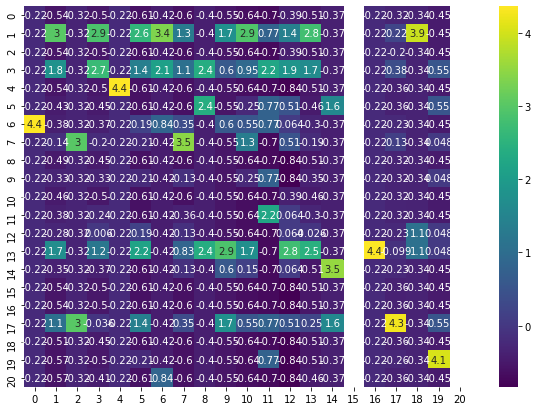

In [34]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = confusion_matrix
df_cm = pd.DataFrame(array)
df_norm_col=(df_cm-df_cm.mean())/df_cm.std()
#df_norm_col=df_cm-df_cm.mean()
plt.figure(figsize = (10,7))
sn.heatmap(df_norm_col, annot=True,cmap='viridis')